# 6289 HW3

## Boyuan Du

In [175]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

df=pd.read_csv("/Users/ericdu/Desktop/TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)
 
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

#predict
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Number of rows and columns: (1328, 7)
Epoch 1/100
24/24 [==============================] - 2s 75ms/step - loss: 0.0522
Epoch 2/100
24/24 [==============================] - 2s 66ms/step - loss: 0.0144
Epoch 3/100
24/24 [==============================] - 2s 65ms/step - loss: 0.0119
Epoch 4/100
24/24 [==============================] - 2s 65ms/step - loss: 0.0135
Epoch 5/100
24/24 [==============================] - 2s 64ms/step - loss: 0.0130
Epoch 6/100
24/24 [==============================] - 2s 74ms/step - loss: 0.0109
Epoch 7/100
24/24 [==============================] - 2s 70ms/step - loss: 0.0120
Epoch 8/100
24/24 [==============================] - 2s 69ms/step - loss: 0.0097
Epoch 9/100
24/24 [==============================] - 2s 70ms/step - loss: 0.0098
Epoch 10/100
24/24 [==============================] - 2s 70ms/step - loss: 0.0095
Epoch 11/100
24/24 [==============================] - 2s 66ms/step - loss: 0.0096
Epoch 12/100
24/24 [==============================] - 2s 64ms/step - 

24/24 [==============================] - 2s 64ms/step - loss: 0.0030
(528, 60, 1)


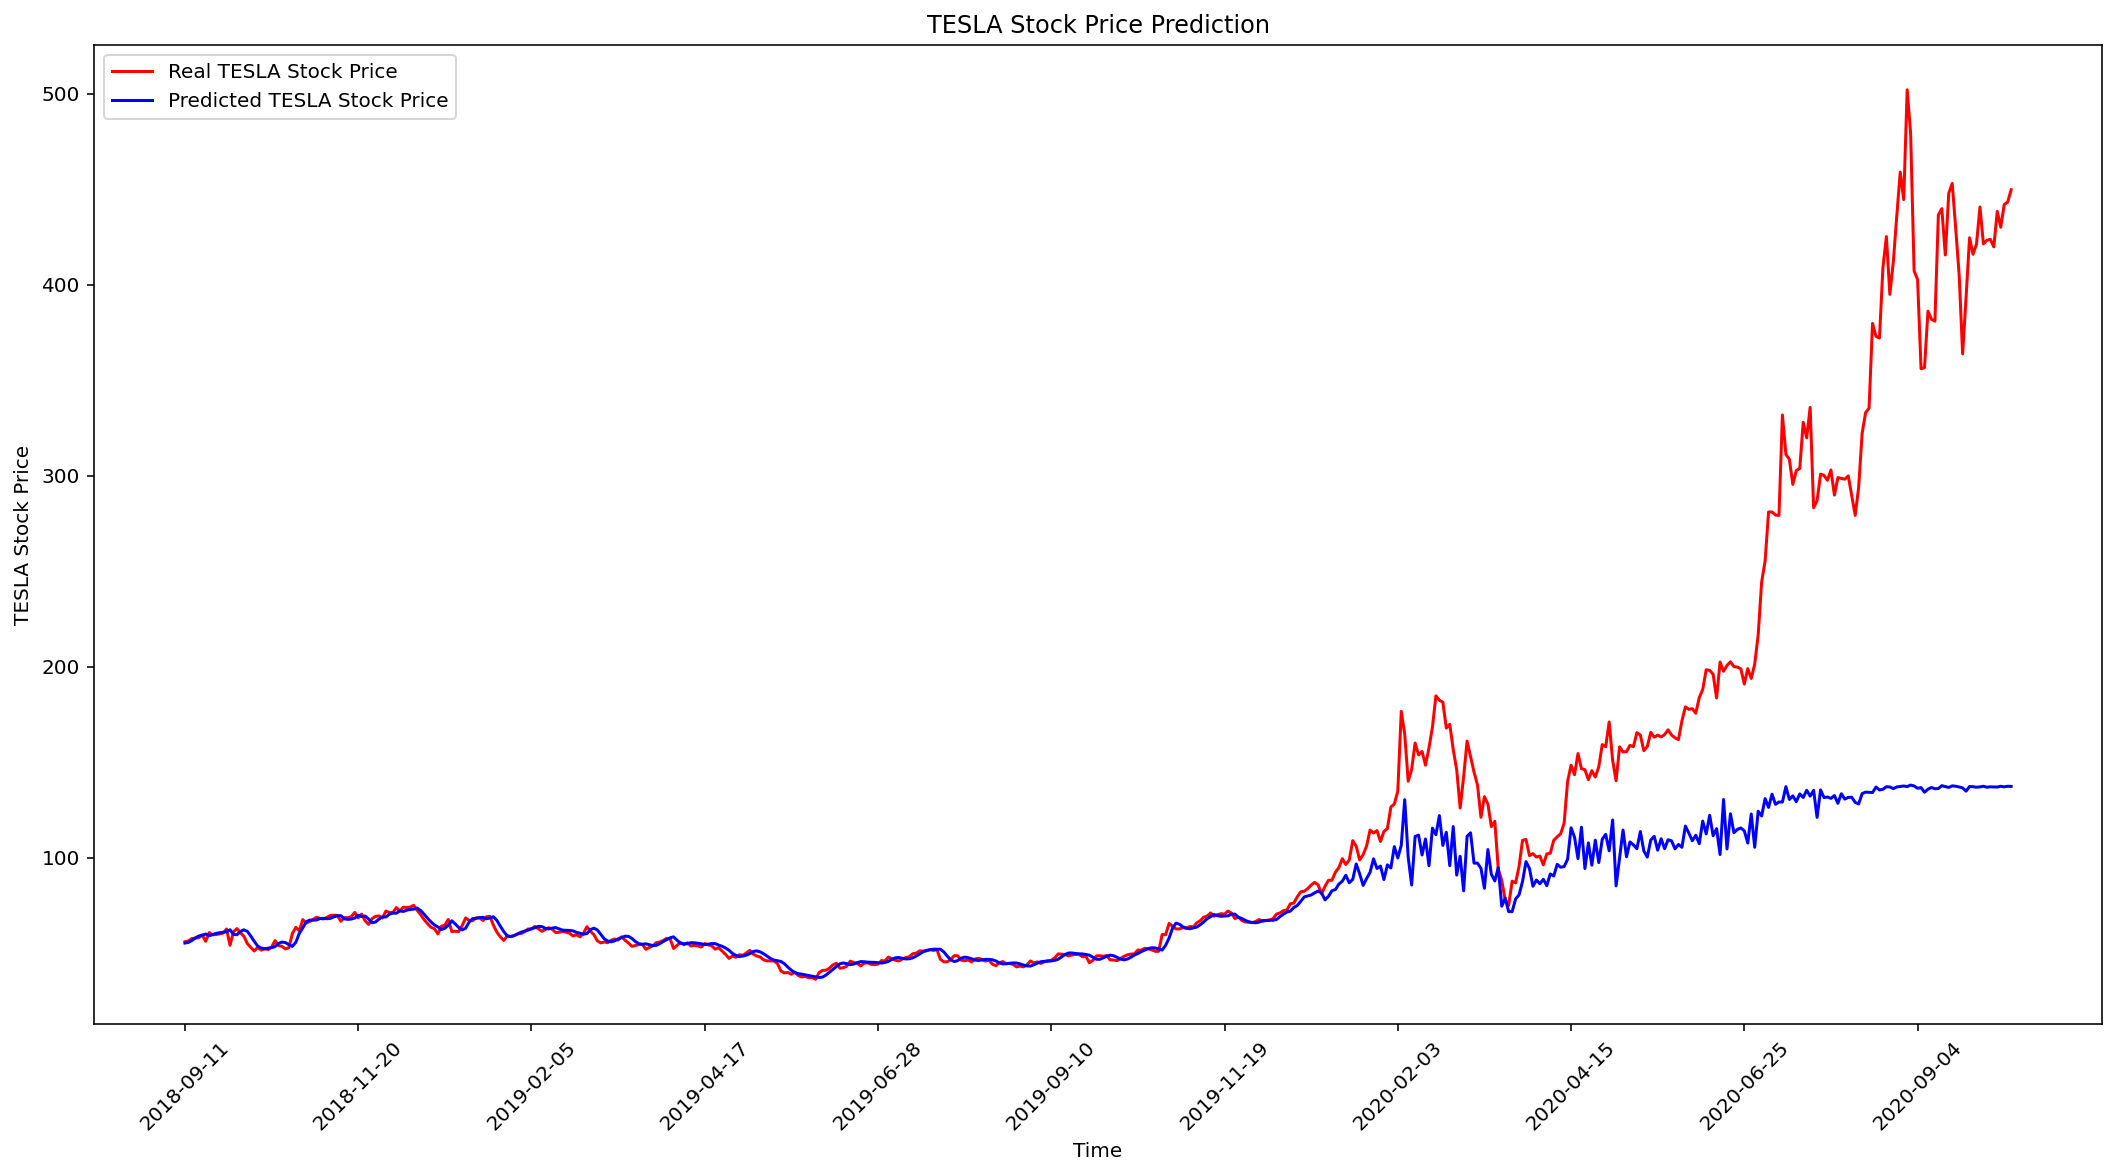

In [176]:
# Visualising the results
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize = (18,9))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50), rotation=45)
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [177]:
# Compare with different hidden layer

# Initial model with 4 Hidden Layers
# model2 with 6 Hidden Layers
model2 = Sequential()
model2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model2.add(Dropout(0.2))
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
model2.add(LSTM(units = 50))
model2.add(Dropout(0.2))
model2.add(Dense(units = 1))

# Compiling the RNN
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
model2.fit(X_train, y_train, epochs = 100, batch_size = 32)

#predict
predicted_stock_price2 = model2.predict(X_test)
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)

Epoch 1/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0846
Epoch 2/100
24/24 [==============================] - 2s 100ms/step - loss: 0.0250
Epoch 3/100
24/24 [==============================] - 2s 100ms/step - loss: 0.0171
Epoch 4/100
24/24 [==============================] - 2s 98ms/step - loss: 0.0159
Epoch 5/100
24/24 [==============================] - 2s 100ms/step - loss: 0.0175
Epoch 6/100
24/24 [==============================] - 2s 98ms/step - loss: 0.0177
Epoch 7/100
24/24 [==============================] - 2s 100ms/step - loss: 0.0144
Epoch 8/100
24/24 [==============================] - 2s 98ms/step - loss: 0.0157
Epoch 9/100
24/24 [==============================] - 2s 98ms/step - loss: 0.0137
Epoch 10/100
24/24 [==============================] - 2s 98ms/step - loss: 0.0147
Epoch 11/100
24/24 [==============================] - 2s 102ms/step - loss: 0.0145
Epoch 12/100
24/24 [==============================] - 2s 100ms/step - loss: 0.0129
Epoch 13/100
24/24

24/24 [==============================] - 2s 103ms/step - loss: 0.0034


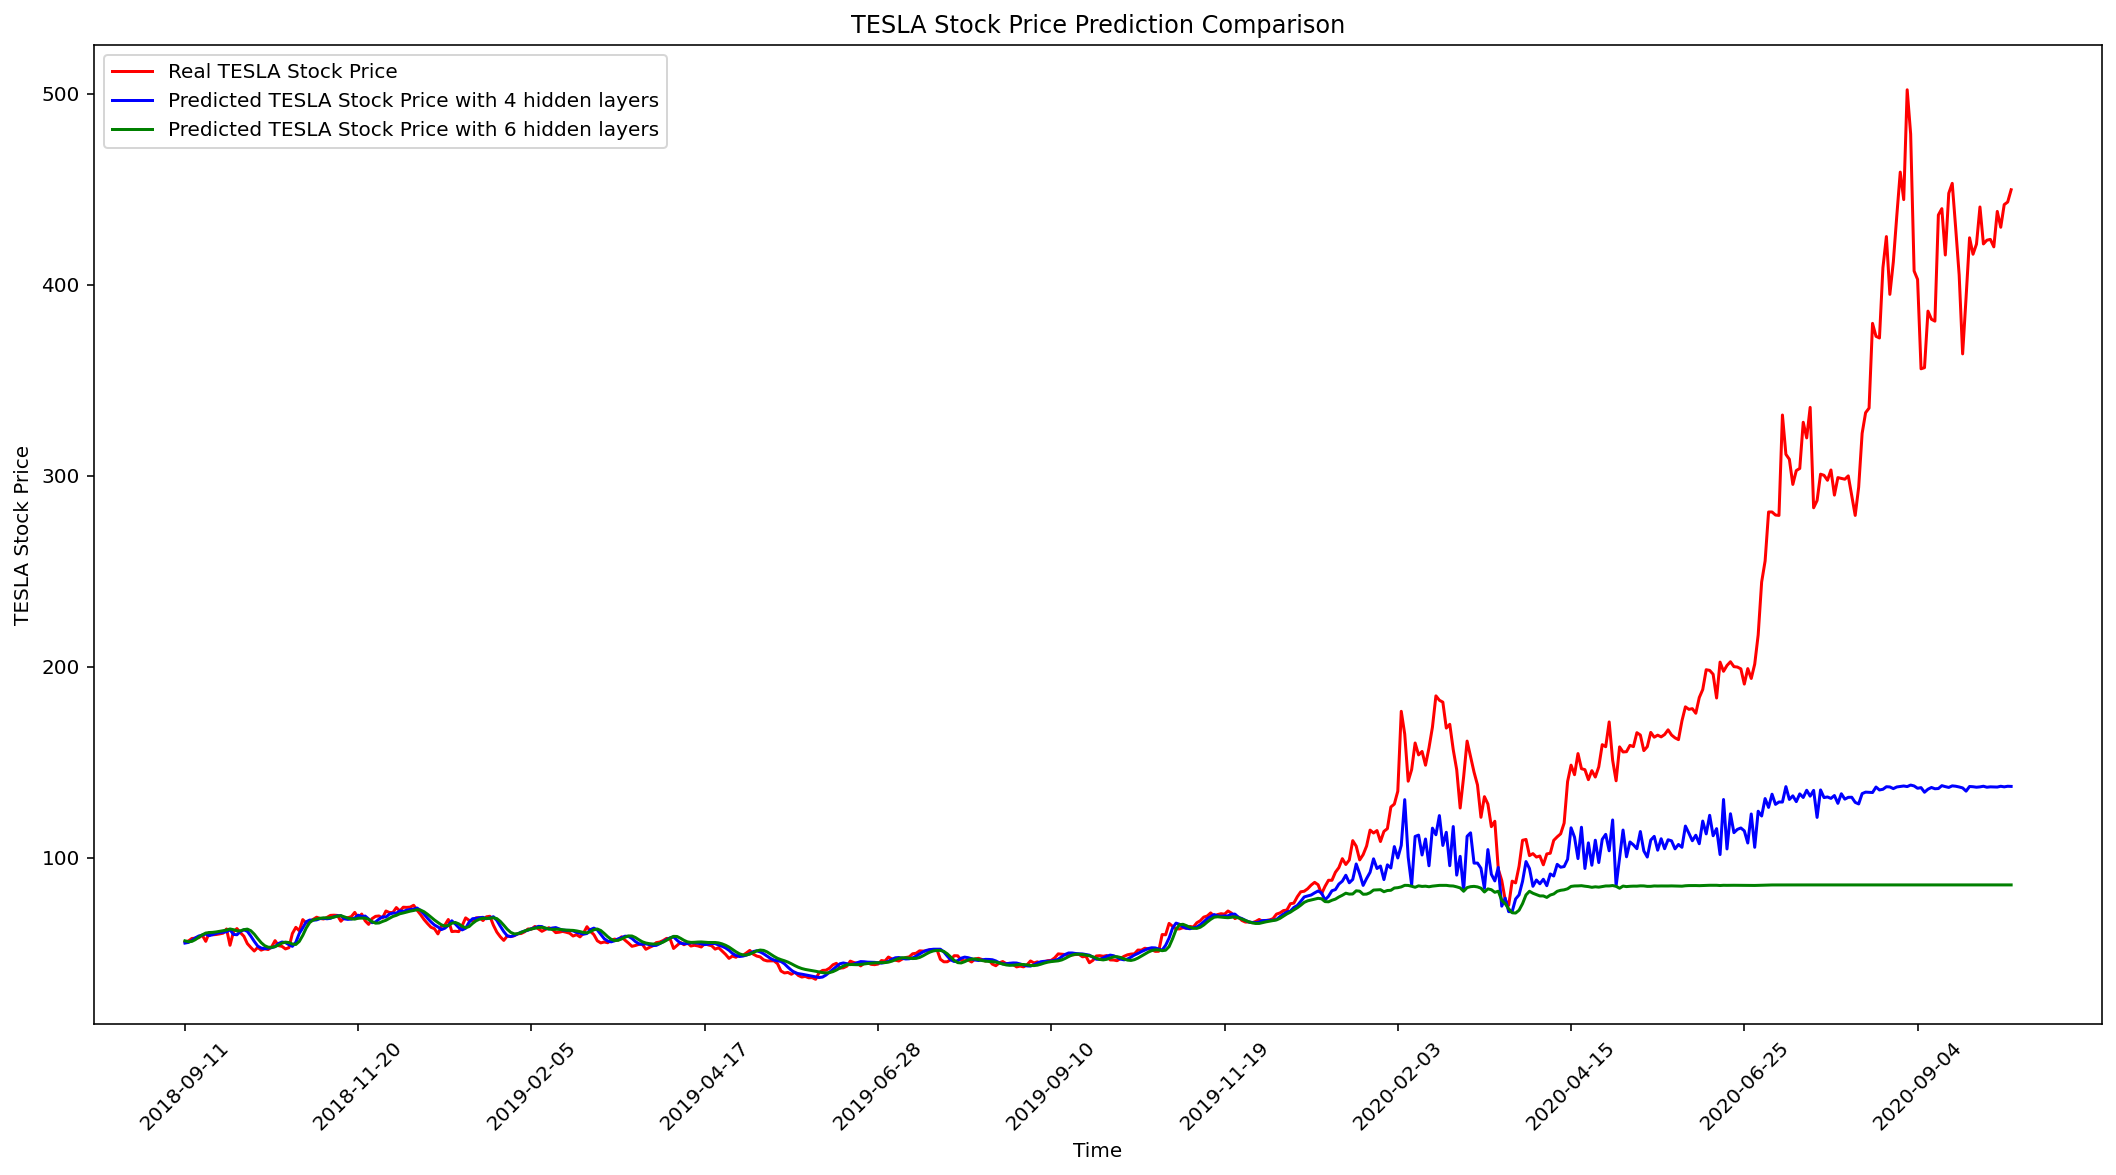

In [178]:
# Visualising the results
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize = (18,9))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price with 4 hidden layers')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price2, color = 'green', label = 'Predicted TESLA Stock Price with 6 hidden layers')
plt.xticks(np.arange(0,528,50), rotation=45)
plt.title('TESLA Stock Price Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [179]:
# Compare with different batch size

# Initial model with a batch size of 32
# Reset Initial model with a batch size of 64

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 64)

#predict
predicted_stock_price3 = model.predict(X_test)
predicted_stock_price3 = sc.inverse_transform(predicted_stock_price3)

Epoch 1/100
12/12 [==============================] - 1s 88ms/step - loss: 0.0035
Epoch 2/100
12/12 [==============================] - 1s 90ms/step - loss: 0.0027
Epoch 3/100
12/12 [==============================] - 1s 84ms/step - loss: 0.0031
Epoch 4/100
12/12 [==============================] - 1s 85ms/step - loss: 0.0027
Epoch 5/100
12/12 [==============================] - 1s 84ms/step - loss: 0.0024
Epoch 6/100
12/12 [==============================] - 1s 86ms/step - loss: 0.0028
Epoch 7/100
12/12 [==============================] - 1s 91ms/step - loss: 0.0026
Epoch 8/100
12/12 [==============================] - 1s 84ms/step - loss: 0.0029
Epoch 9/100
12/12 [==============================] - 1s 84ms/step - loss: 0.0025
Epoch 10/100
12/12 [==============================] - 1s 82ms/step - loss: 0.0028
Epoch 11/100
12/12 [==============================] - 1s 83ms/step - loss: 0.0027
Epoch 12/100
12/12 [==============================] - 1s 84ms/step - loss: 0.0026
Epoch 13/100
12/12 [=====

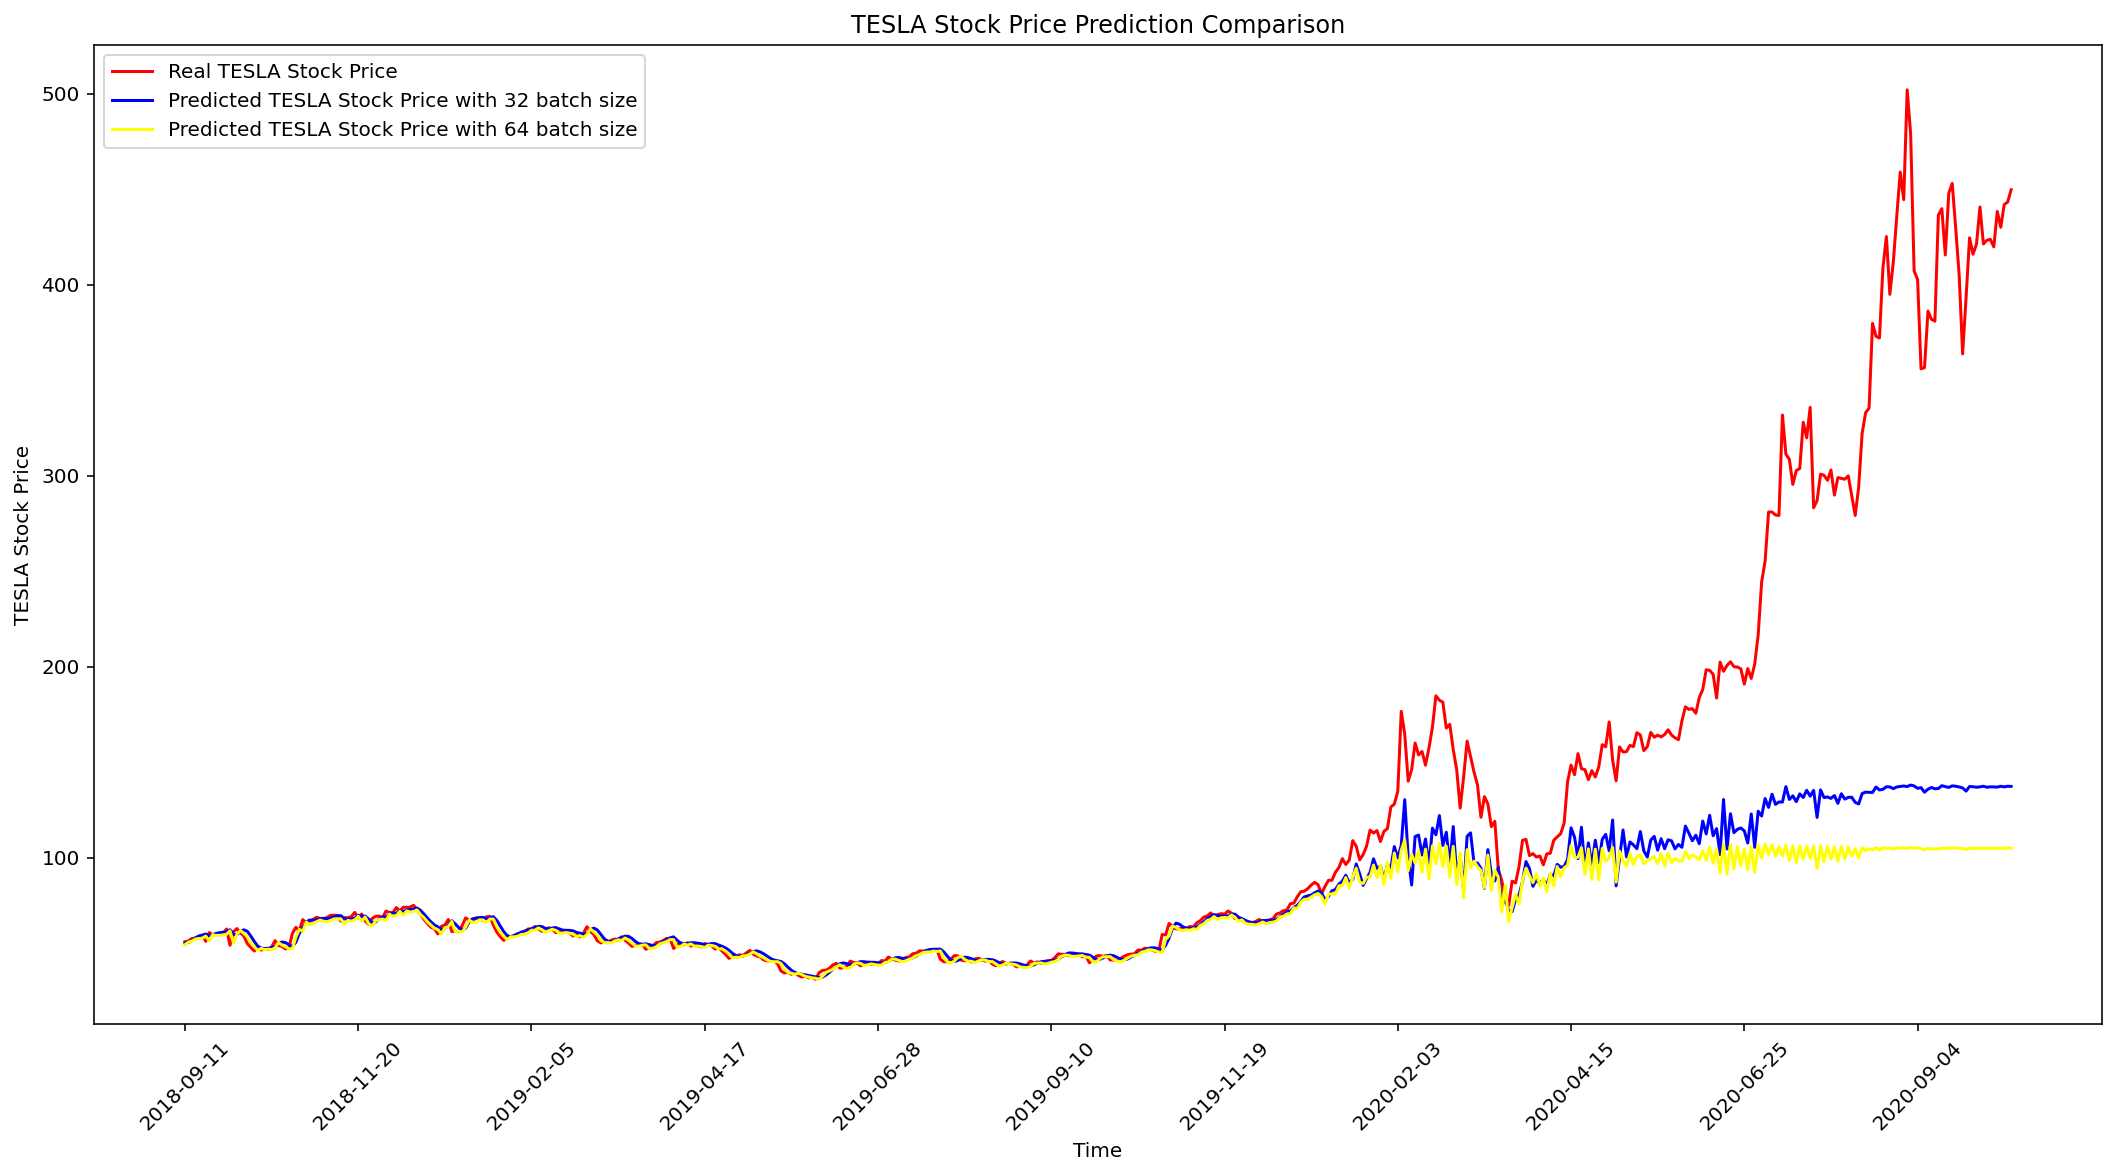

In [180]:
# Visualising the results
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize = (18,9))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price with 32 batch size')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price3, color = 'yellow', label = 'Predicted TESLA Stock Price with 64 batch size')
plt.xticks(np.arange(0,528,50),rotation=45)
plt.title('TESLA Stock Price Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [181]:
# Compare with different drop rate

# Initial model with a 0.2 drop rate
# model4 with 0.5 drop rate
model4 = Sequential()
model4.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model4.add(Dropout(0.5))
model4.add(LSTM(units = 50, return_sequences = True))
model4.add(Dropout(0.5))
model4.add(LSTM(units = 50, return_sequences = True))
model4.add(Dropout(0.5))
model4.add(LSTM(units = 50))
model4.add(Dropout(0.5))
model4.add(Dense(units = 1))

# Compiling the RNN
model4.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
model4.fit(X_train, y_train, epochs = 100, batch_size = 32)

#predict
predicted_stock_price4 = model4.predict(X_test)
predicted_stock_price4 = sc.inverse_transform(predicted_stock_price4)

Epoch 1/100
24/24 [==============================] - 2s 77ms/step - loss: 0.0891
Epoch 2/100
24/24 [==============================] - 2s 71ms/step - loss: 0.0254
Epoch 3/100
24/24 [==============================] - 2s 67ms/step - loss: 0.0203
Epoch 4/100
24/24 [==============================] - 2s 69ms/step - loss: 0.0212
Epoch 5/100
24/24 [==============================] - 2s 75ms/step - loss: 0.0194
Epoch 6/100
24/24 [==============================] - 2s 69ms/step - loss: 0.0197
Epoch 7/100
24/24 [==============================] - 2s 69ms/step - loss: 0.0175
Epoch 8/100
24/24 [==============================] - 2s 67ms/step - loss: 0.0186
Epoch 9/100
24/24 [==============================] - 2s 69ms/step - loss: 0.0199
Epoch 10/100
24/24 [==============================] - 2s 67ms/step - loss: 0.0164
Epoch 11/100
24/24 [==============================] - 2s 67ms/step - loss: 0.0170
Epoch 12/100
24/24 [==============================] - 2s 66ms/step - loss: 0.0157
Epoch 13/100
24/24 [=====

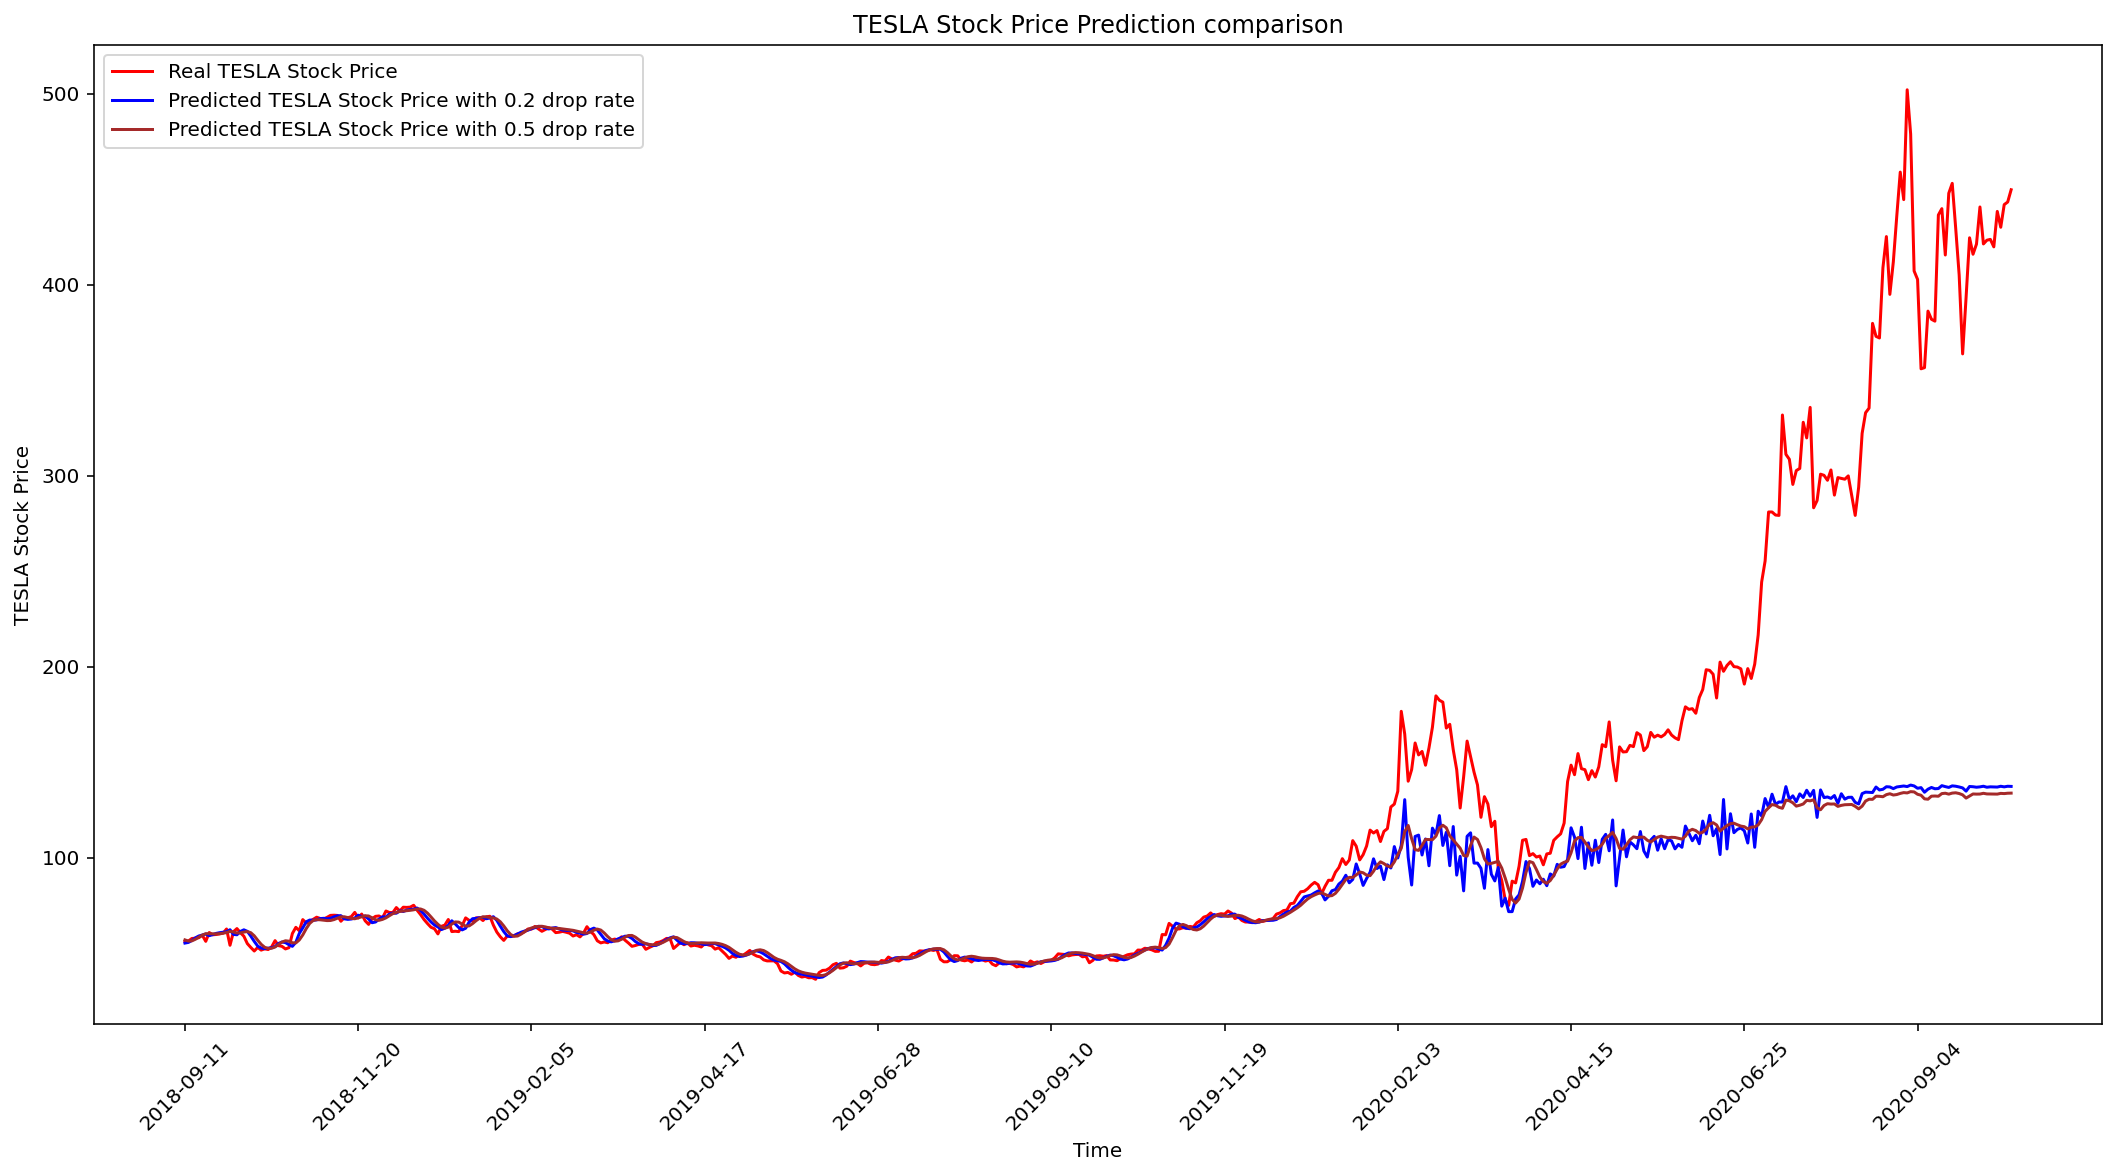

In [182]:
# Visualising the results
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize = (18,9))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price with 0.2 drop rate')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price4, color = 'brown', label = 'Predicted TESLA Stock Price with 0.5 drop rate')
plt.xticks(np.arange(0,528,50),rotation=45)
plt.title('TESLA Stock Price Prediction comparison')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [186]:
# Predictions for future two weeks, until Oct 28, 2020
import copy
X_test2 = copy.deepcopy(X_test)
for i in range(14):
    X_temp = np.zeros([1,60,1])
    for j in range(58):
        X_temp[0][j][0]= X_test[-1][j+1][0]
    X_temp[0][59][0] = model.predict(X_test2[-1:])[0][0]
    X_test2 = np.vstack([X_test2,X_temp])

predicted_stock_price5 = model.predict(X_test2)
predicted_stock_price5 = sc.inverse_transform(predicted_stock_price5)
predicted_stock_price5.shape

(542, 1)

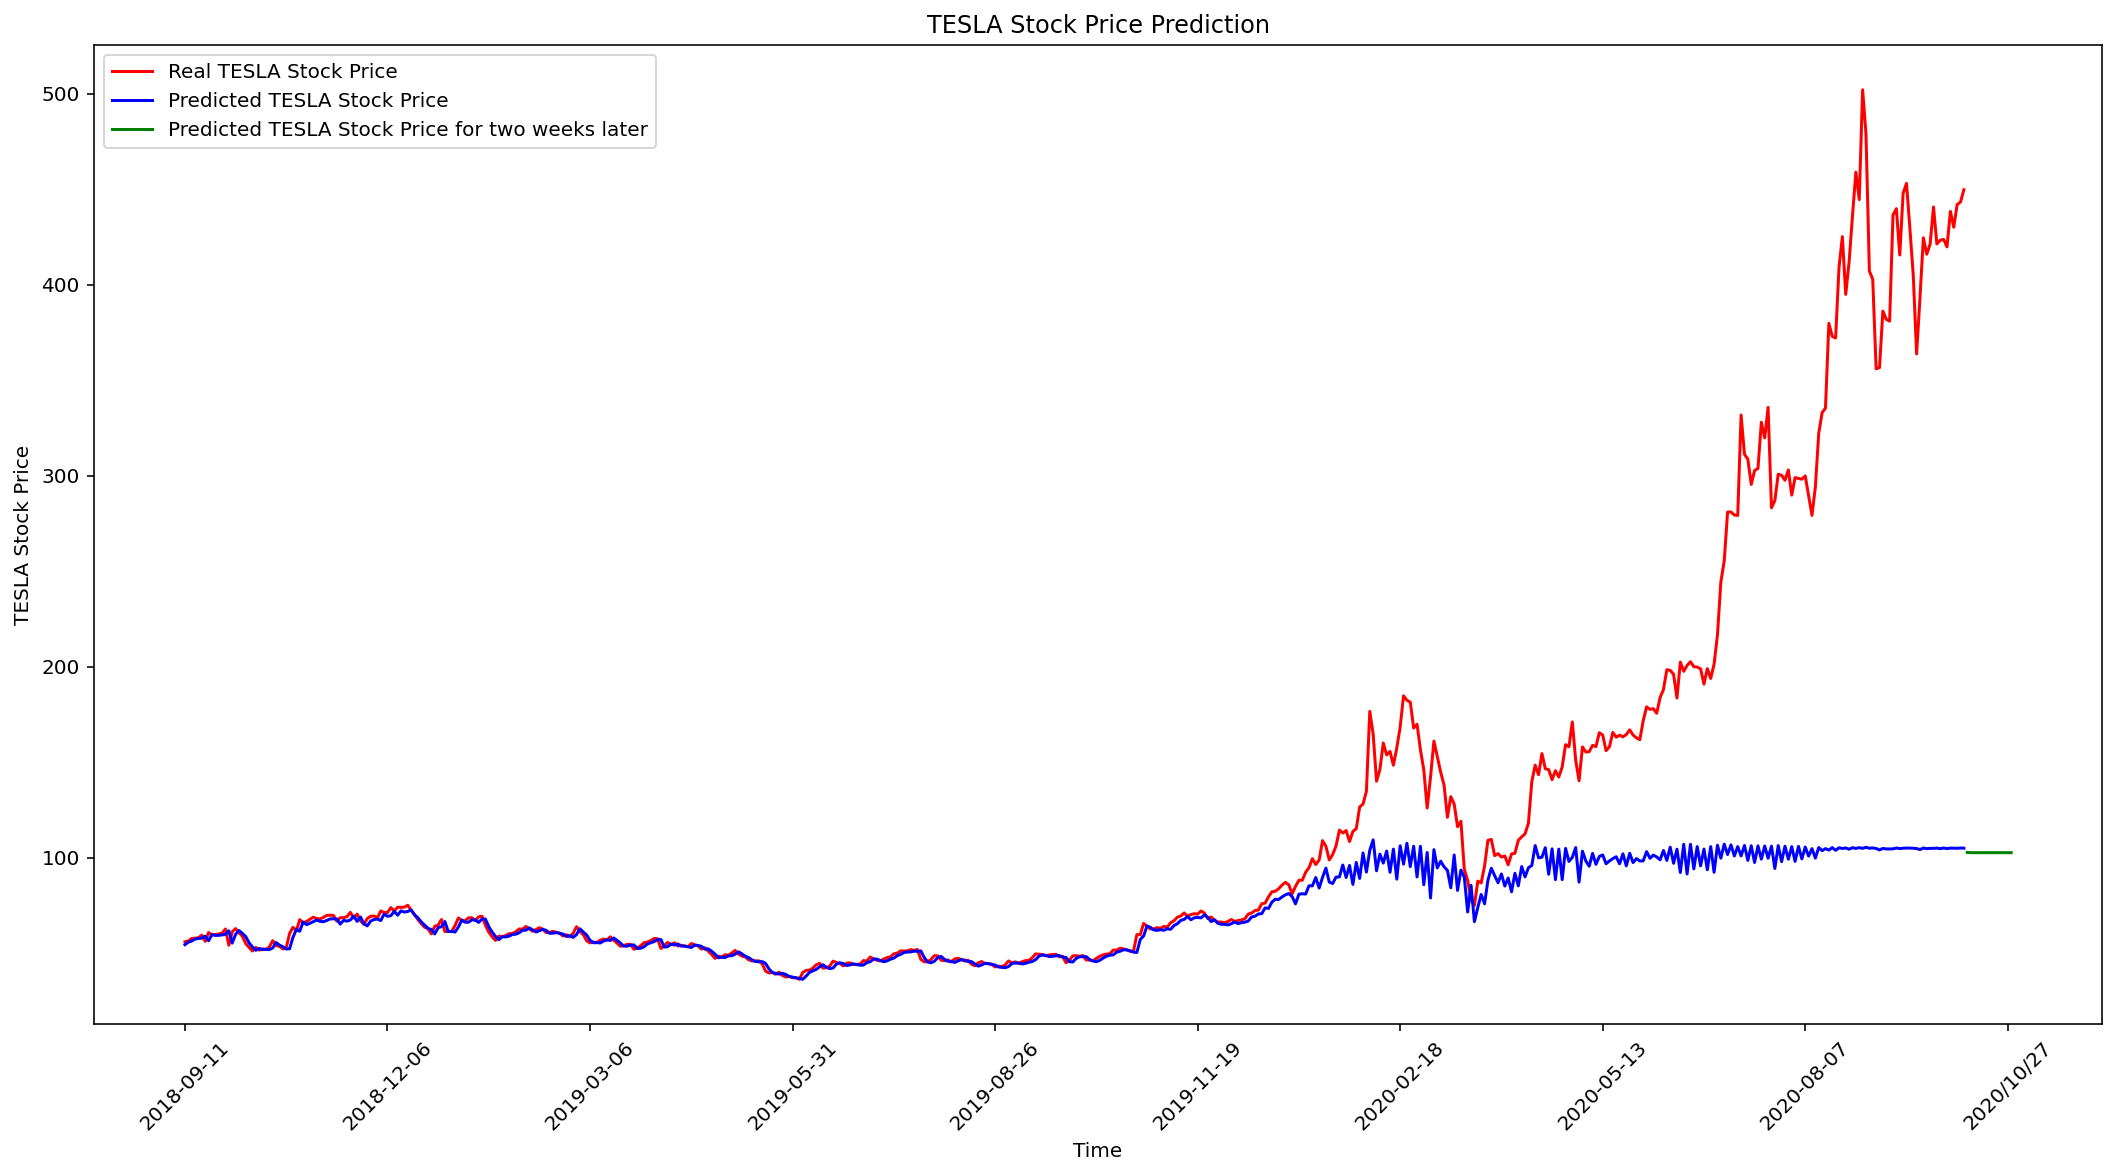

In [187]:
# Visualising the results
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize = (18,9))
date = ["2020/10/15","2020/10/16","2020/10/17","2020/10/18","2020/10/19","2020/10/20","2020/10/21","2020/10/22","2020/10/23","2020/10/24","2020/10/25","2020/10/26","2020/10/27","2020/10/28"]
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price5[0:528], color = 'blue', label = 'Predicted TESLA Stock Price')
plt.plot(date, predicted_stock_price5[528:], color = 'green', label = 'Predicted TESLA Stock Price for two weeks later')
plt.title('TESLA Stock Price Prediction')
plt.xticks(np.arange(0,542,60), rotation=45)
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()